<a href="https://colab.research.google.com/github/miguelcbarbosa/Introducao_Ciencia_Dados/blob/main/ICD_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução de Ciência de Dados - Aula 1

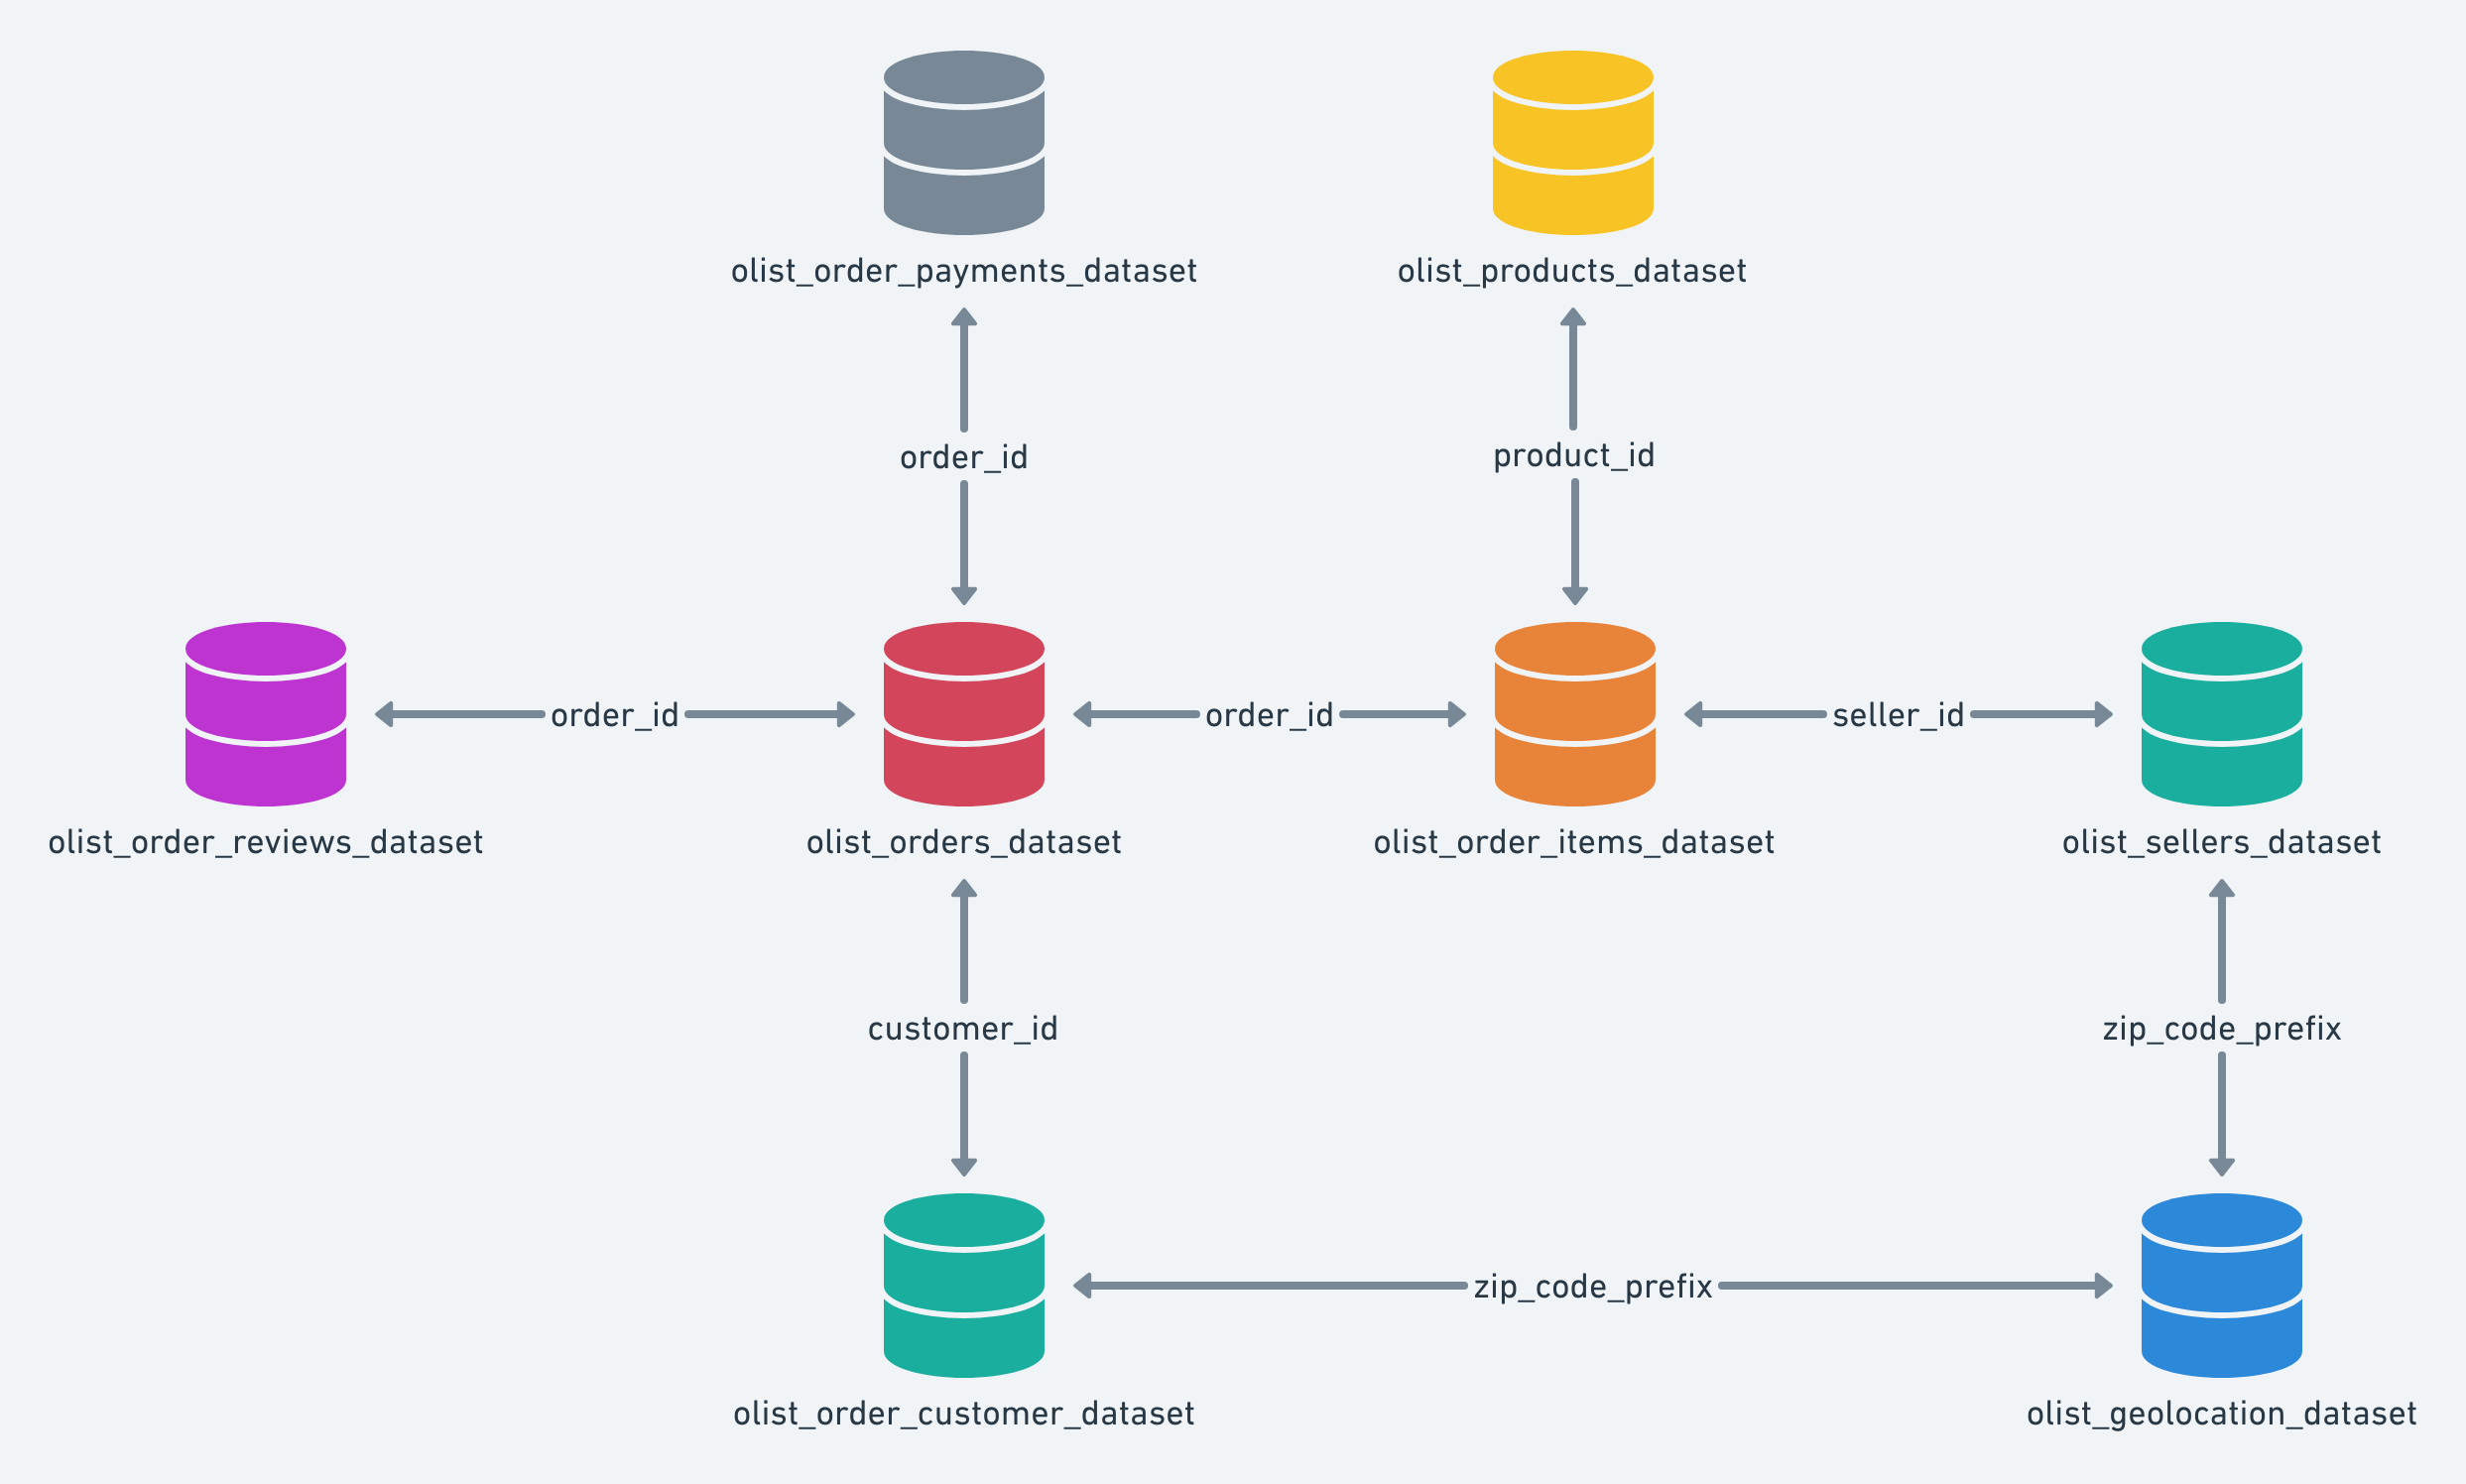

###Importação de Bibliotecas e carregamento de arquivos


In [40]:
#Bibliotecas
import pandas as pd

In [41]:
# Instalando Pandas profiling
!pip install -U pandas-profiling

#Instalando o gitly
!pip install gitly


Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [42]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('github')

In [43]:
#Carregando os arquivos
path_dir = '/content/drive/MyDrive/Colab Notebooks/DataSets/Introducao a Ciencia de Dados/Aula 1 - OLIST'
dfCustomer = pd.read_csv( path_dir + '/olist_customers_dataset.csv')
dfGeolocation = pd.read_csv(path_dir + '/olist_geolocation_dataset.csv', encoding='utf8')
dfOrderItems = pd.read_csv(path_dir + '/olist_order_items_dataset.csv')
dfOrderPayments = pd.read_csv(path_dir + '/olist_order_payments_dataset.csv')
dfReviews = pd.read_csv(path_dir + '/olist_order_reviews_dataset.csv')
dfOrders = pd.read_csv(path_dir + '/olist_orders_dataset.csv')
dfProducts = pd.read_csv(path_dir + '/olist_products_dataset.csv')
dfSellers = pd.read_csv(path_dir + '/olist_sellers_dataset.csv')

##Exploração e Análise

##Payment (EDA)
Pandas profiling

In [44]:
dfOrderPayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [45]:
dfOrderPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [46]:
dfOrderPayments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [47]:
dfOrderPayments.corr()

,payment_sequential,payment_installments,payment_value
payment_sequential,1.000000,-0.086363,-0.069593
payment_installments,-0.086363,1.000000,0.330811
payment_value,-0.069593,0.330811,1.000000


In [48]:
dfOrderPayments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [49]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dfOrderPayments)
profile.to_notebook_iframe()
profile.to_file(output_file="OrderPaymentsProfile.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Order

In [50]:
dfOrders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [51]:
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### **Trabalhando com datetime**

In [52]:

prazoEstimado = dfOrders.iloc[0].order_estimated_delivery_date
dataEntrega =  dfOrders.iloc[0].order_delivered_customer_date

#Por enquanto as datas são textos
print(type(dataEntrega))

#Convertendo a COLUNA para datetime
dfOrders.order_purchase_timestamp = pd.to_datetime(dfOrders.order_purchase_timestamp,format='%Y-%m-%d')
dfOrders.order_estimated_delivery_date = pd.to_datetime(dfOrders.order_estimated_delivery_date,format='%Y-%m-%d')
dfOrders.order_delivered_customer_date = pd.to_datetime(dfOrders.order_delivered_customer_date,format='%Y-%m-%d')
dfOrders.order_approved_at = pd.to_datetime(dfOrders.order_approved_at,format='%Y-%m-%d')
dfOrders.order_delivered_carrier_date = pd.to_datetime(dfOrders.order_delivered_carrier_date,format='%Y-%m-%d')

#Verificando se a conversão deu certo
dfOrders.info()

#Trabalhando com datetime
prazoEstimado = dfOrders.iloc[0].order_estimated_delivery_date
dataEntrega =  dfOrders.iloc[0].order_delivered_customer_date

print(f'Dias de sobra para entrega: {prazoEstimado-dataEntrega} dias')

#Criando uma coluna verificando quando a entrega foi feita fora do prazo
dfOrders['NoPrazo'] = dfOrders.order_estimated_delivery_date > dfOrders.order_delivered_customer_date



<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
Dias de sobra para entrega: 7 days 02:34:47 dias


In [53]:
dfOrders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,NoPrazo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True


In [54]:
#Contagem de cada valor em uma coluna e ordena
dfOrders['NoPrazo'].value_counts()


True     88649
False    10792
Name: NoPrazo, dtype: int64

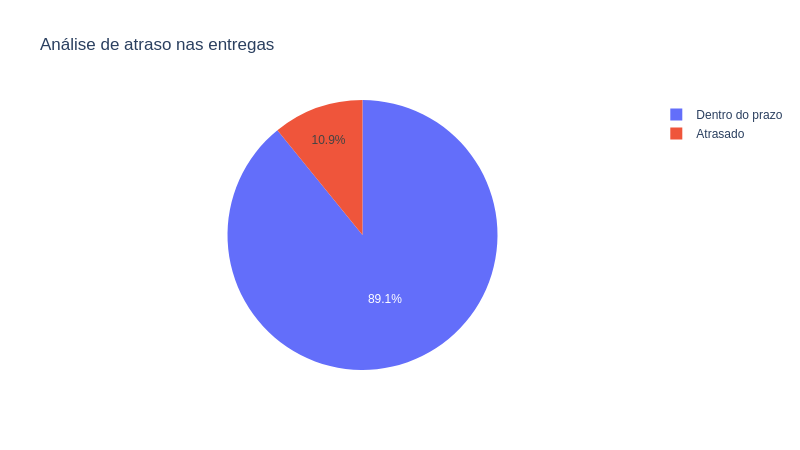

In [55]:
import plotly.express as px
data= dfOrders['NoPrazo'].value_counts()
fig = px.pie(data,values ='NoPrazo',names=['Dentro do prazo','Atrasado'],title='Análise de atraso nas entregas')
gitly.show(fig)

###Qual a distribuição de compras durante a semana?

In [56]:
dfOrders['diaSemana'] = dfOrders.order_purchase_timestamp.dt.day_name()
print(dfOrders.diaSemana.value_counts())


Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: diaSemana, dtype: int64


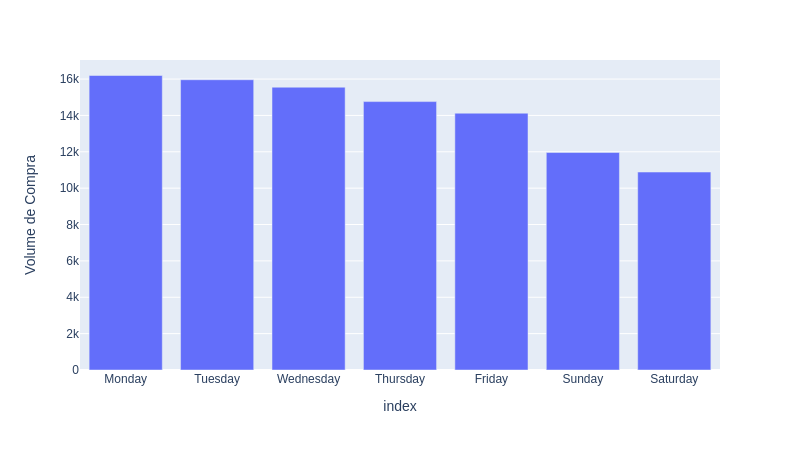

In [57]:
data = dfOrders.diaSemana.value_counts()
fig = px.bar(data,x=data.index,y='diaSemana',labels={'diaSemana':'Volume de Compra','x':'Dia'})
gitly.show(fig)

In [58]:
dfOrders['diaMes'] =  dfOrders.order_purchase_timestamp.dt.day
print(dfOrders.head(3))

                           order_id  ... diaMes
0  e481f51cbdc54678b7cc49136f2d6af7  ...      2
1  53cdb2fc8bc7dce0b6741e2150273451  ...     24
2  47770eb9100c2d0c44946d9cf07ec65d  ...      8

[3 rows x 11 columns]


Zona de pagamento: do 30 a dia 7

In [59]:
def verificaZonaSalario(dia):
  zonaS=[1,2,3,4,5,6,7,30,31]
  return dia in zonaS #Vai retornar True ou False

dfOrders['zonaSalario'] = dfOrders.diaMes.apply(verificaZonaSalario) 
print(dfOrders.head(3))

                           order_id  ... zonaSalario
0  e481f51cbdc54678b7cc49136f2d6af7  ...        True
1  53cdb2fc8bc7dce0b6741e2150273451  ...       False
2  47770eb9100c2d0c44946d9cf07ec65d  ...       False

[3 rows x 12 columns]


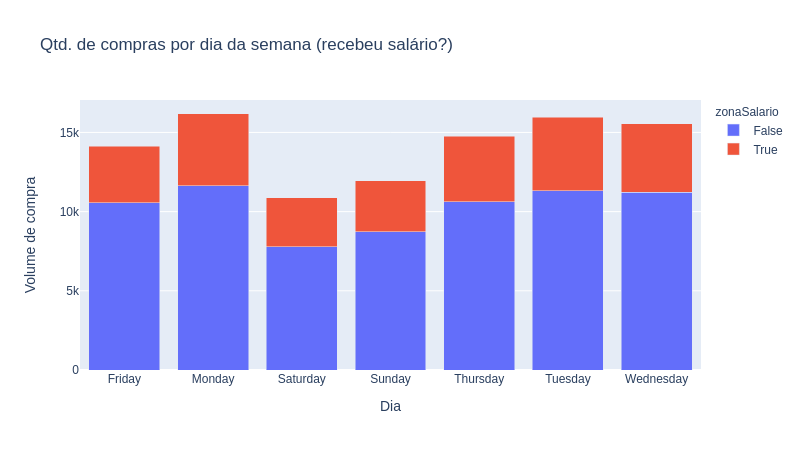

In [60]:
data = dfOrders.groupby(by=['diaSemana', 'zonaSalario']).count()['order_id'].rename('qtd_compras').reset_index() 
data['zonaSalario'] = data.zonaSalario.astype('str') #Foi alterado para conseguir montar o gráfico seguinte. Seria mais interessante transformar em string na função verificaZonaSalario

fig = px.bar(data, x='diaSemana', y='qtd_compras', color='zonaSalario', title="Qtd. de compras por dia da semana (recebeu salário?)", 
             barmode = 'stack', labels={'qtd_compras':'Volume de compra', 'diaSemana':'Dia'})
gitly.show(fig)


###Qual o horário com maior volume de compras durante o dia?

In [61]:
dfVolumeHora = dfOrders.order_purchase_timestamp.dt.hour.value_counts().rename('volume_hora').reset_index()
data = dfVolumeHora.sort_values(by='index', ascending=True)
print(data)

    index  volume_hora
16      0         2394
18      1         1170
19      2          510
21      3          272
22      4          206
23      5          188
20      6          502
17      7         1231
15      8         2967
13      9         4785
7      10         6177
1      11         6578
9      12         5995
3      13         6518
2      14         6569
4      15         6454
0      16         6675
8      17         6150
12     18         5769
10     19         5982
6      20         6193
5      21         6217
11     22         5816
14     23         4123


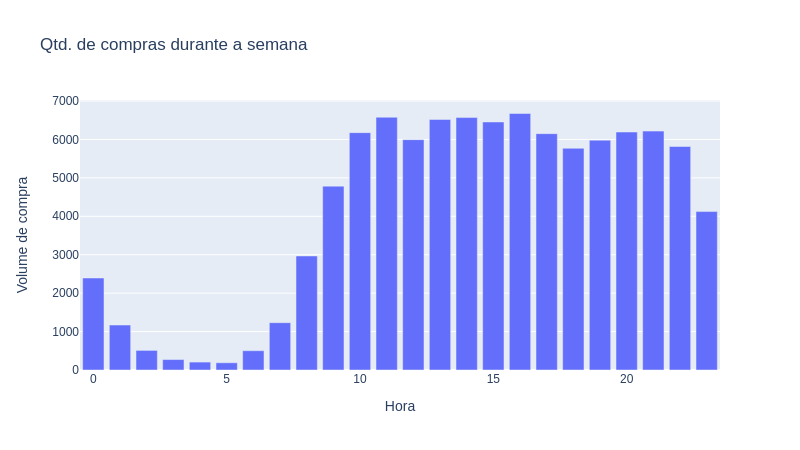

In [62]:
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de compras durante a semana',
                labels={'volume_hora':'Volume de compra', 'index':'Hora'})
gitly.show(fig)

### Horário de entrega durante o dia?

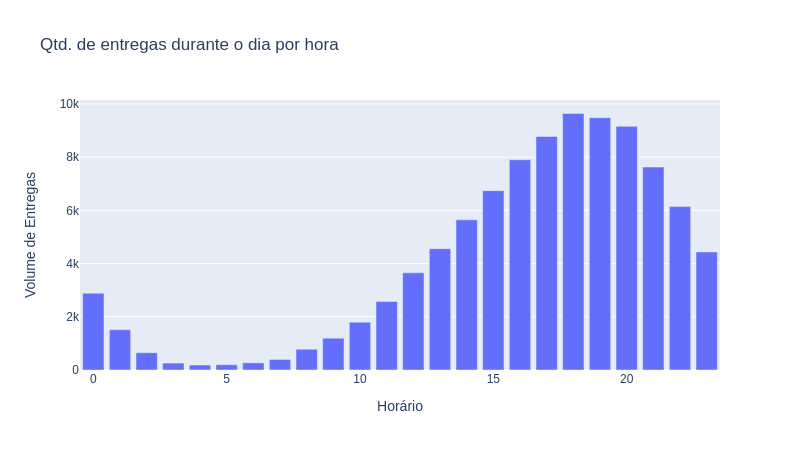

In [67]:
dfVolumeHora = dfOrders.order_delivered_customer_date.dt.hour.value_counts().rename('volume_hora').reset_index()
data = dfVolumeHora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de entregas durante o dia por hora',
                labels={'volume_hora':'Volume de Entregas', 'index':'Horário'})
gitly.show(fig)

### Horario de entrega dos prodututos aos entregadores

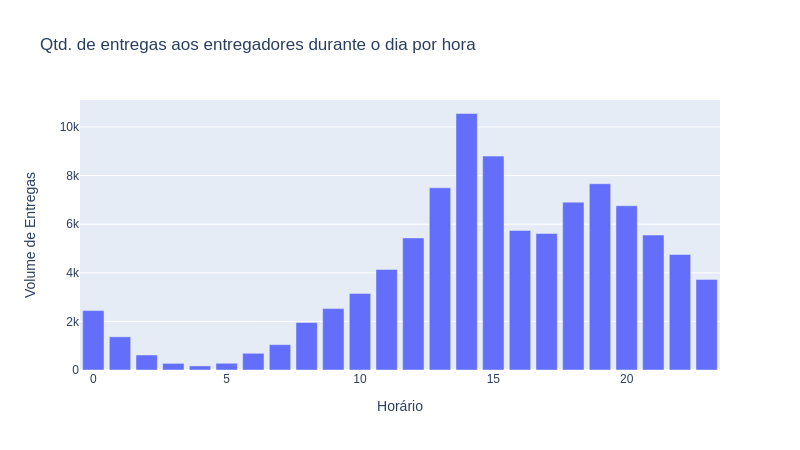

In [68]:
dfVolumeHora = dfOrders.order_delivered_carrier_date.dt.hour.value_counts().rename('volume_hora').reset_index()
data = dfVolumeHora.sort_values(by='index', ascending=True)
fig = px.bar(data, x='index', y='volume_hora', title='Qtd. de entregas aos entregadores durante o dia por hora',
                labels={'volume_hora':'Volume de Entregas', 'index':'Horário'})
gitly.show(fig)

##Merge


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

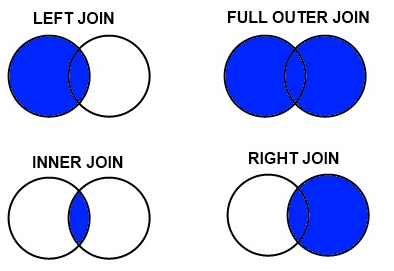

####Inner Join

In [ ]:
pd.merge(df0,df1,how='inner',left_on ='produtoLojaA',right_on='produtoLojaB')   #Usar left_on caso o nome das colunas sejam diferentes, senão utilizar somente on

####Left Join

In [ ]:
pd.merge(df0,df1,how='left',left_on ='produtoLojaA',right_on='produtoLojaB')   #Usar left_on caso o nome das colunas sejam diferentes, senão utilizar somente on

####Right Join

In [ ]:
pd.merge(df0,df1,how='right',left_on ='produtoLojaA',right_on='produtoLojaB')   #Usar left_on caso o nome das colunas sejam diferentes, senão utilizar somente on

####Outer Join

In [ ]:
pd.merge(df0,df1,how='outer',left_on ='produtoLojaA',right_on='produtoLojaB')   #Usar left_on caso o nome das colunas sejam diferentes, senão utilizar somente on

####Quais as categorias mais vendidas?

In [69]:
#Usaremos os datasets dfOrderItems e o dfProducts
dfProdCat = pd.merge(dfProducts[['product_id','product_category_name']],dfOrderItems[['product_id','price','freight_value']],how='inner',on='product_id')
data =dfProdCat.product_category_name.value_counts() 
print(data)

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64


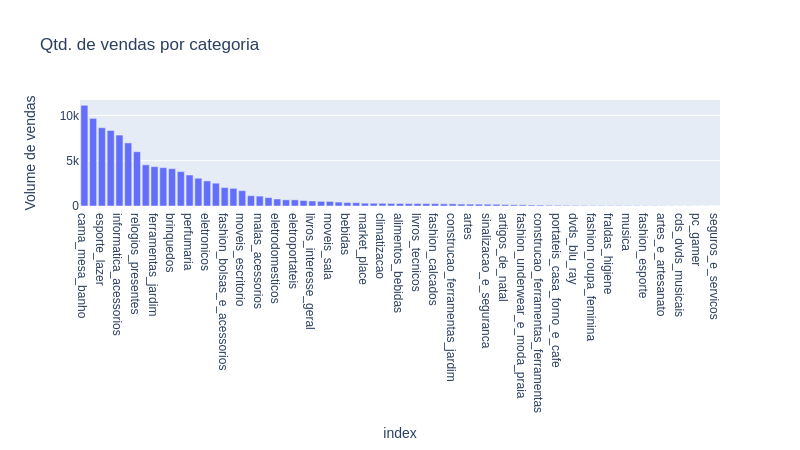

In [70]:

fig = px.bar(data, x=data.index, y='product_category_name', title='Qtd. de vendas por categoria',
                labels={'product_category_name':'Volume de vendas', 'x':'Categoria'})
gitly.show(fig)

####Qual é a categoria que mais fatura?

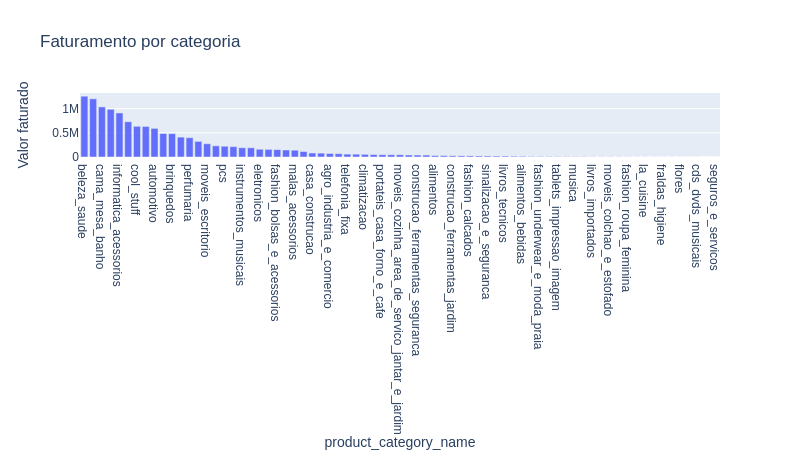

In [71]:
data = dfProdCat.groupby(by='product_category_name').sum().sort_values(by='price', ascending=False)
fig = px.bar(data, x=data.index, y='price', title='Faturamento por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show(fig)

####Qual a categoria mais cara (em média)? 

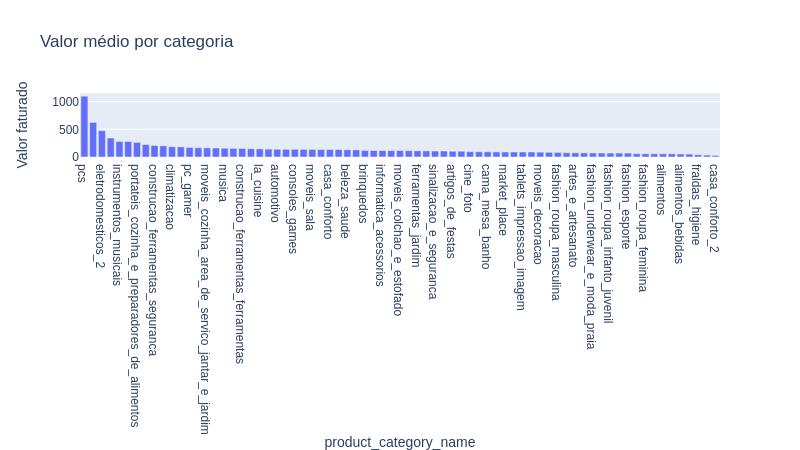

In [72]:
data = dfProdCat.groupby(by='product_category_name').mean().sort_values(by='price', ascending=False)
fig = px.bar(data, x=data.index, y='price', title='Valor médio por categoria',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show(fig)

####Mapear os haters

In [74]:
dfRevOrder = pd.merge( dfReviews[['order_id', 'review_score']], dfOrders[['order_id', 'customer_id']],how='inner',on='order_id')
dfAvaliacoes = pd.merge(dfRevOrder,dfCustomer[['customer_id', 'customer_city', 'customer_state']], how='inner', on='customer_id')

dfHaters = dfAvaliacoes.groupby(by=['customer_state']).mean().sort_values(by='review_score', ascending=False)
print(dfHaters.head())

                review_score
customer_state              
AP                  4.176471
PR                  4.167654
SP                  4.160579
AM                  4.154362
RS                  4.125658


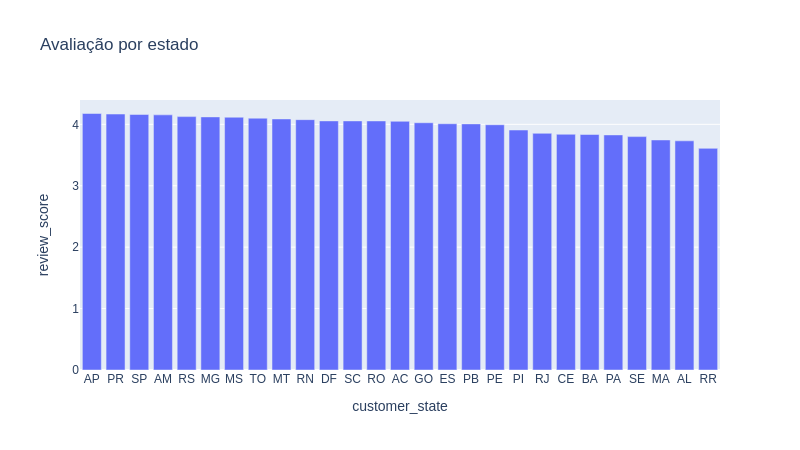

In [75]:
data = dfHaters
fig = px.bar(data, x=data.index, y='review_score', title='Avaliação por estado',
                labels={'price':'Valor faturado', 'x':'Categoria'})
gitly.show(fig)


#####True Haters

In [76]:
dfQtdAvaliacoes = dfAvaliacoes.customer_state.value_counts().rename('qtd_avaliacoes')
dfQtdHaters = dfAvaliacoes.query('review_score <= 2').customer_state.value_counts().rename('qtd_haters')

dfTrueHaters = pd.merge( dfQtdAvaliacoes, dfQtdHaters, left_index=True, right_index=True )
dfTrueHaters['hater_ratio'] = dfTrueHaters.qtd_haters / dfTrueHaters.qtd_avaliacoes

print(dfTrueHaters.sort_values(by='hater_ratio', ascending=False))


    qtd_avaliacoes  qtd_haters  hater_ratio
AL             417         102     0.244604
RR              46          11     0.239130
MA             751         167     0.222370
SE             350          77     0.220000
RJ           12930        2750     0.212684
CE            1339         271     0.202390
PA             982         198     0.201629
BA            3398         667     0.196292
PI             496          93     0.187500
PE            1665         285     0.171171
PB             537          91     0.169460
AC              81          13     0.160494
ES            2043         322     0.157611
AM             149          23     0.154362
RO             253          39     0.154150
DF            2160         330     0.152778
GO            2037         311     0.152676
SC            3651         552     0.151191
RN             487          73     0.149897
MS             726         105     0.144628
MT             910         129     0.141758
MG           11706        1603  